In [1]:
# This code is for the UW battery analysis proejct. 
# The input data consists of ambient temperature, battery capacity, voltage, current, and battery average temperature.

# Libraries

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import os
import sklearn
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

# Working Directory

In [3]:
# Change the current working directory

os.listdir()

['.git',
 '.gitattributes',
 '.ipynb_checkpoints',
 'LinearRegTemperature.png',
 'LinearRegVoltage.png',
 'ModifiedData.xlsx',
 'README.md',
 'Results',
 'Result_LinearReg.xlsx',
 'UW_MultiVarRegressionBatteryProject.ipynb']

# Loading the Data



In [4]:
# Read the processed data 
all_data = pd.read_excel("ModifiedData.xlsx") 
all_data.info()
all_data.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18683 entries, 0 to 18682
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   amb_temp  18683 non-null  int64  
 1   capacity  18683 non-null  float64
 2   current   18683 non-null  float64
 3   voltage   18683 non-null  float64
 4   avg_temp  18683 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 729.9 KB


False

In [5]:
# Data listing
print(all_data.head())
print(all_data.tail())

   amb_temp  capacity  current  voltage   avg_temp
0        22     0.000   47.489    3.222  24.980545
1        22     0.004   99.997    3.115  24.992219
2        22     0.008   99.992    3.112  25.011674
3        22     0.015   99.999    3.109  25.015565
4        22     0.023   99.992    3.106  25.023346
       amb_temp  capacity  current  voltage   avg_temp
18678        35    84.439    4.094    3.478  35.964981
18679        35    84.444    4.076    3.478  35.953307
18680        35    84.450    4.032    3.479  35.957198
18681        35    84.456    4.010    3.480  35.964980
18682        35    84.456    3.997    3.481  35.957198


# Data Describe

In [6]:
all_data.describe()

,amb_temp,capacity,current,voltage,avg_temp
count,18683.000000,18683.000000,18683.000000,18683.000000,18683.000000
mean,19.812075,43.785578,75.763917,3.244893,25.873589
std,12.513120,33.296459,34.994760,0.288343,12.299435
min,5.000000,0.000000,3.783000,2.799000,6.501945
25%,5.000000,8.569000,65.894500,3.034000,15.719844
50%,22.000000,44.373000,94.118000,3.113000,25.389105
75%,35.000000,78.946500,94.127000,3.538000,36.521400
max,35.000000,94.253000,100.294000,3.601000,51.077821


# Separating inputs and outputs and train-test split

In [7]:
# Separating inputs and outputs
X=all_data.iloc[:,[0, 1, 2]]
y=all_data.iloc[:,[3,4]];
print(X.shape)
print(y.shape)

(18683, 3)
(18683, 2)


In [8]:
# Split training , test data
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((13078, 3), (5605, 3), (13078, 2), (5605, 2))

# Range and Mean

In [9]:
# Feature normalization and scaling 
# Find the range of inputs
Range_Input=X_train.max()-X_train.min()
print("Ranges..................")
print(Range_Input)
Mean_Input=np.mean(X_train,axis=0)
print("Mean Values..............")
print(Mean_Input)

Ranges..................
amb_temp    30.000
capacity    94.253
current     96.299
dtype: float64
Mean Values..............
amb_temp    19.801957
capacity    43.701948
current     75.880843
dtype: float64


# Model performance and Plots Function

In [17]:
# Model predictions, exporting results and plot function 
def ModelTrainTest(X,y,X_train, X_test, y_train, y_test, model, ModelName):
        # print('Score on test set: ', model.score(X_test,y_test))
    # print('Score on full set: ', model.score(X,y))
    y_test_pred = model.predict(X_test)
    print('Results with:' + ModelName)
    print ('R2 Score on test set: ', sklearn.metrics.r2_score(y_test, y_test_pred))
    y_pred = model.predict(X)
    R2score=sklearn.metrics.r2_score(y, y_pred)
    print ('R2 Score on full set: ', R2score)
    y_true=y.to_numpy()
    # Plotting results
    print('-'*50)
    fig, ax1 = plt.subplots()
    # Predicted outputs 
    ax1.plot(y_pred[:,0] , '--b', label='Predicted Voltage')
    ax1.plot(y_true[:,0] , '-g', label='True Voltage')
    ax1.legend(fancybox=True,bbox_to_anchor=(1.04,1), loc='upper left', framealpha=1, shadow=True, borderpad=1)
    plt.savefig(f'Results\{ModelName}_Voltage',bbox_inches="tight")
    fig, ax2 = plt.subplots()
    
    
    ax2.plot(y_pred[:,1] , '--b', label='Predicted temperature')
    ax2.plot(y_true[:,1] , '-g', label='True temperature')
    ax2.legend(fancybox=True,bbox_to_anchor=(1.04,1), loc='upper left', framealpha=1, shadow=True, borderpad=1)
    plt.savefig(f'Results\{ModelName}_Temperature',bbox_inches="tight")
    #----------------------
    # Export results 
    df1=pd.DataFrame(y)
    df1.columns={'True Voltage', 'True Temperature'}
    df2=pd.DataFrame(y_pred)
    df2.columns={'Predicted Voltage', 'Predicted Temperature'}
    # stack data 
    Output_data=[df1, df2]
    Output_data=pd.concat(Output_data,axis=1)
    out_22, out_5, out_35=Output_data.iloc[0:5781,:],Output_data.iloc[5782:12734,:],Output_data.iloc[12735:18682,:]
    
    writer = pd.ExcelWriter('Results\Result_'+ModelName+ '.xlsx', engine='xlsxwriter')
    # Write each dataframe to a different worksheet.
    out_22.to_excel(writer, sheet_name='Temp_22')
    out_5.to_excel(writer, sheet_name='Temp_5')
    out_35.to_excel(writer, sheet_name='Temp_35')
    # Close the Pandas Excel writer and output the Excel file.
    writer.close()
    #Output_data.to_excel('Result_LinearReg.xlsx', index=False)
    # plt.savefig("figure.png") # save as png
    
    return y_pred

# Regression Models

## Linear Regression

Results with:LinearReg
R2 Score on test set:  0.49729548631120807
R2 Score on full set:  0.5018393755390548
--------------------------------------------------


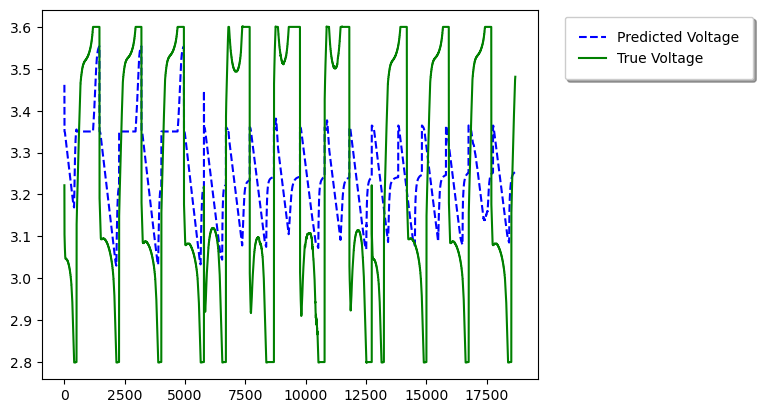

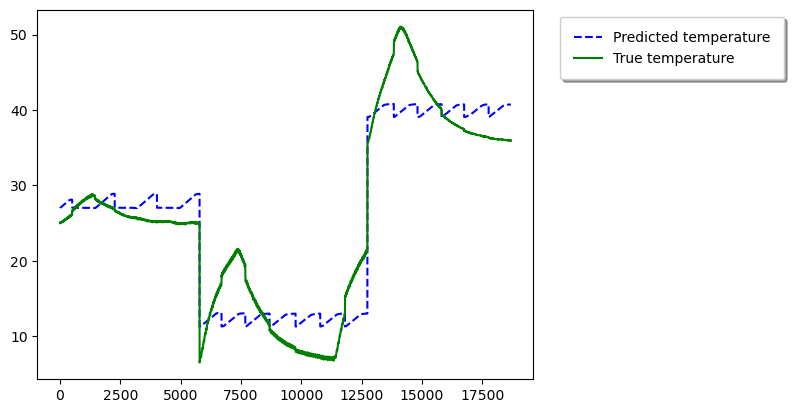

In [18]:
# Linear Regression 
from sklearn.linear_model import LinearRegression
# define model
model = LinearRegression()
# fit model
model.fit(X, y)
# Predictions and Results 
y_pred=ModelTrainTest(X,y,X_train, X_test, y_train, y_test, model, 'LinearReg')


Results with:KNeigh
R2 Score on test set:  0.7036351651347366
R2 Score on full set:  0.6987416424025612
--------------------------------------------------


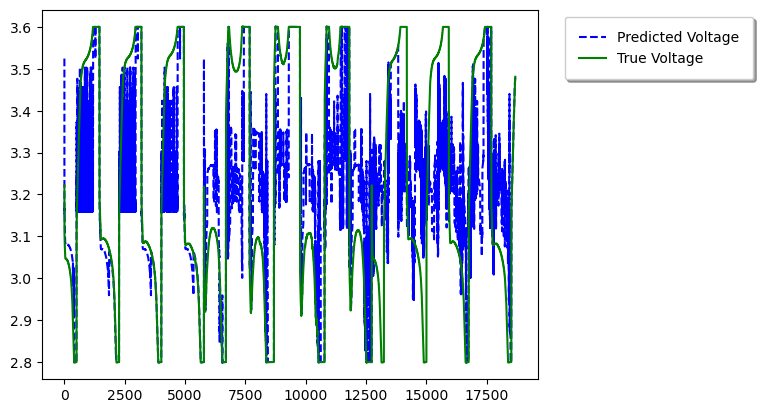

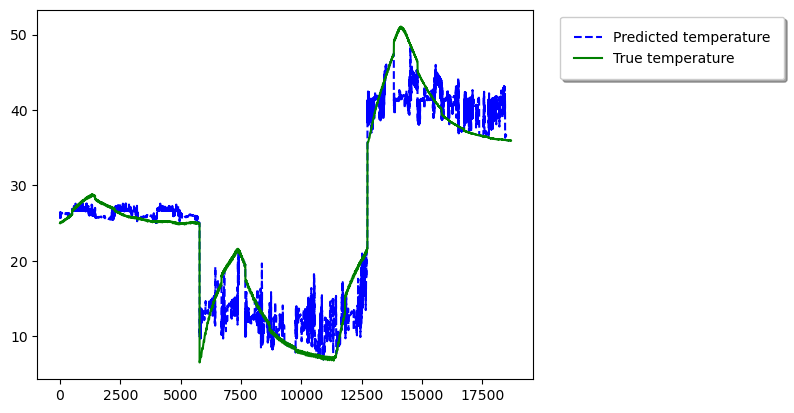

In [19]:
# K-Nearest Neighbors 
from sklearn.neighbors import KNeighborsRegressor
# define model
model = KNeighborsRegressor()
# fit model
model.fit(X, y)
# Predictions and Results 
y_pred=ModelTrainTest(X,y,X_train, X_test, y_train, y_test, model, 'KNeigh')

## RandomForest Refressor

Results with:RandomForest
R2 Score on test set:  0.9447785455821925
R2 Score on full set:  0.9445539539220785
--------------------------------------------------


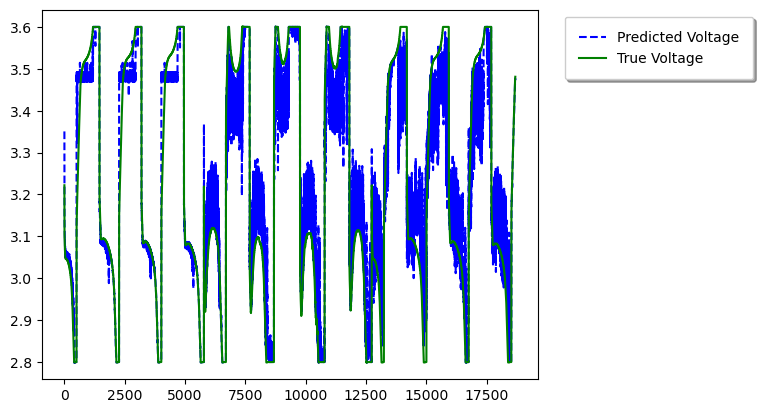

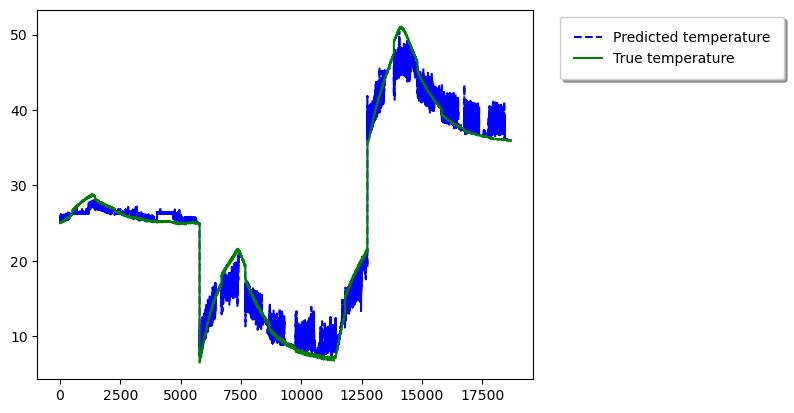

In [20]:
# Random Forest 
from sklearn.ensemble import RandomForestRegressor
# define model
model = RandomForestRegressor()
# fit model
model.fit(X, y)
# Predictions and Results 
y_pred=ModelTrainTest(X,y,X_train, X_test, y_train, y_test, model, 'RandomForest')

## Decision Tree Regression

Results with Support Vector Regression
Results with:DecisionTree
R2 Score on test set:  0.9910704484749262
R2 Score on full set:  0.990159188392475
--------------------------------------------------


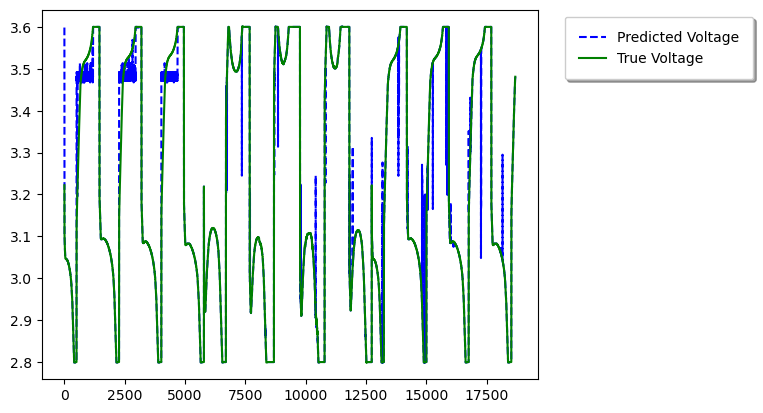

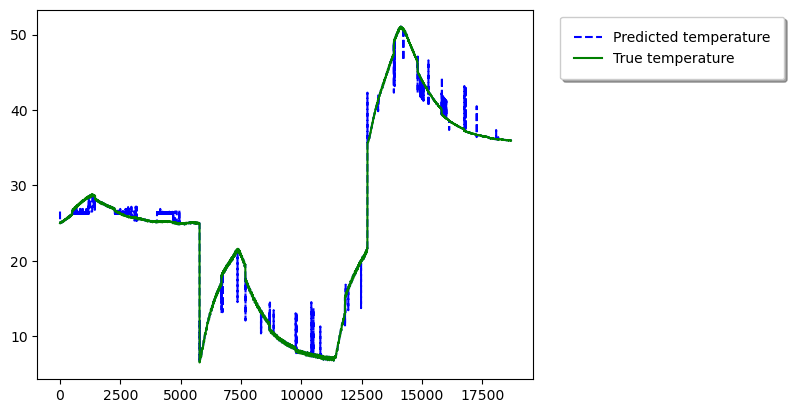

In [21]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(max_depth=150)
# fit model
model.fit(X, y)
print('Results with Support Vector Regression')
# Predictions and Results 
y_pred=ModelTrainTest(X,y,X_train, X_test, y_train, y_test, model, 'DecisionTree')